# Q1 Sobel

## a)

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

# generate random matrix with size n*n


def generateRandomMatrix(n):
    # pass
    return np.random.randint(0, 256, size=(n, n))  # 0-255


In [3]:
# write convolution function
def convolve(matrix, kernel):
  # rotate?
  # pass
  ker_rows, ker_cols = kernel.shape
  rows_padding = math.floor(ker_rows / 2)
  cols_padding = math.floor(ker_cols / 2)
  padded_matrix = np.pad(matrix, (rows_padding, cols_padding), 'reflect') # https://numpy.org/doc/stable/reference/generated/numpy.pad.html
  
  rows, cols = matrix.shape
  convolved_matrix = np.zeros((rows, cols))

  for i in range(rows):
    for j in range(cols):
      tmp = padded_matrix[i:i+ker_rows, j:j+ker_cols] * kernel
      convolved_matrix[i][j] = np.sum(tmp)
  
  return convolved_matrix



In [4]:
# generate horizontal and vertical kernels
horizontal_sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
vertical_sobel_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


(-0.5, 9.5, 9.5, -0.5)

<Figure size 1500x1500 with 0 Axes>

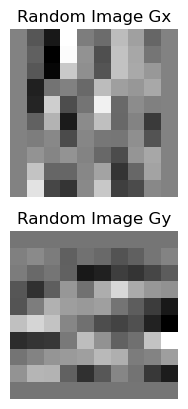

In [5]:
# convolve the initial matrix with kernels
initial_matrix = generateRandomMatrix(10)
horizontal_gradient = convolve(initial_matrix, horizontal_sobel_kernel)
vertical_gradient = convolve(initial_matrix, vertical_sobel_kernel)

plt.figure(figsize=(15,15))
fugure, axis = plt.subplots(2, 1)
axis[0].imshow(horizontal_gradient, cmap='gray')
axis[0].set_title('Random Image Gx')
axis[1].imshow(vertical_gradient, cmap='gray')
axis[1].set_title('Random Image Gy')
# remove axis numbers
axis[0].axis('off')
axis[1].axis('off')

In [6]:
def calculate_magnitude(horizontal_gradient, vertical_gradient):
  rows, cols = horizontal_gradient.shape
  magnitude_matrix = np.zeros((rows, cols))
  
  # for row in range(rows):
  #   for col in range(cols):
  #     magnitude_matrix[row][col] = math.sqrt(horizontal_gradient[row][col]**2 + vertical_gradient[row][col]**2)
  
  magnitude_matrix = np.sqrt(horizontal_gradient**2 + vertical_gradient**2)

  # normalize to 0-255
  # magnitude_matrix = np.floor(magnitude_matrix / np.max(magnitude_matrix) * 255)

  return magnitude_matrix

def calculate_direction(horizontal_gradient, vertical_gradient):
  rows, cols = vertical_gradient.shape
  direction_matrix = np.zeros((rows, cols))

  # for row in range(rows):
  #   for col in range(cols):
  #     direction_matrix[row][col] = math.atan2(vertical_gradient[row][col], horizontal_gradient[row][col])

  direction_matrix = np.arctan2(vertical_gradient, horizontal_gradient)

  # normalize to 0-255
  # direction_matrix = np.floor(direction_matrix / np.max(direction_matrix) * 255)

  return direction_matrix

# generate magnitude and direction matrixes
magnitude_matrix = calculate_magnitude(horizontal_gradient, vertical_gradient) # need to be normalized to 0-255
direction_matrix = calculate_direction(horizontal_gradient, vertical_gradient)

(-0.5, 9.5, 9.5, -0.5)

<Figure size 1500x1500 with 0 Axes>

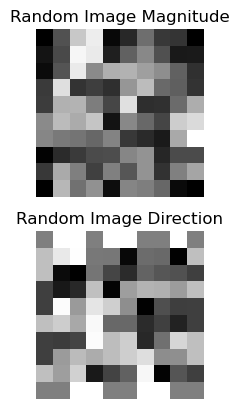

In [7]:
plt.figure(figsize=(15,15))
fugure, axis = plt.subplots(2, 1)
axis[0].imshow(magnitude_matrix, cmap='gray')
axis[0].set_title('Random Image Magnitude')
axis[1].imshow(direction_matrix, cmap='gray')
axis[1].set_title('Random Image Direction')
# remove axis numbers
axis[0].axis('off')
axis[1].axis('off')

## b)

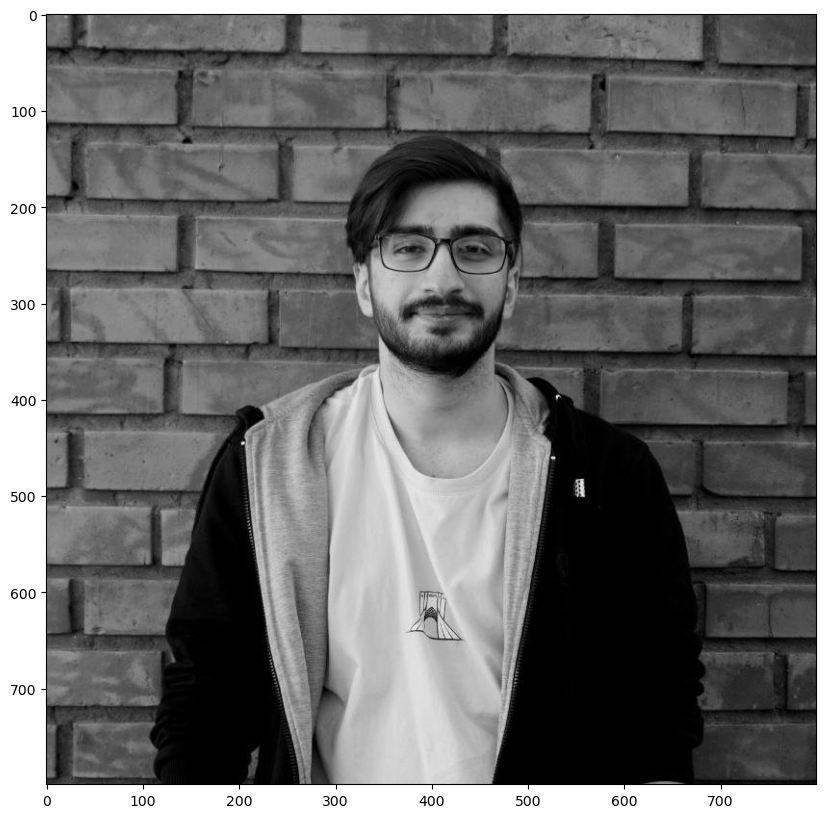

In [8]:
# load image and convert it to gray scale
image = cv2.imread('images/afshin.jpg', cv2.IMREAD_GRAYSCALE)
# show image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')

# cv2.imshow('image', image)
# # waits for user to press any key
# # (this is necessary to avoid Python kernel form crashing)
# cv2.waitKey(0)
# # closing all open windows
# cv2.destroyAllWindows()


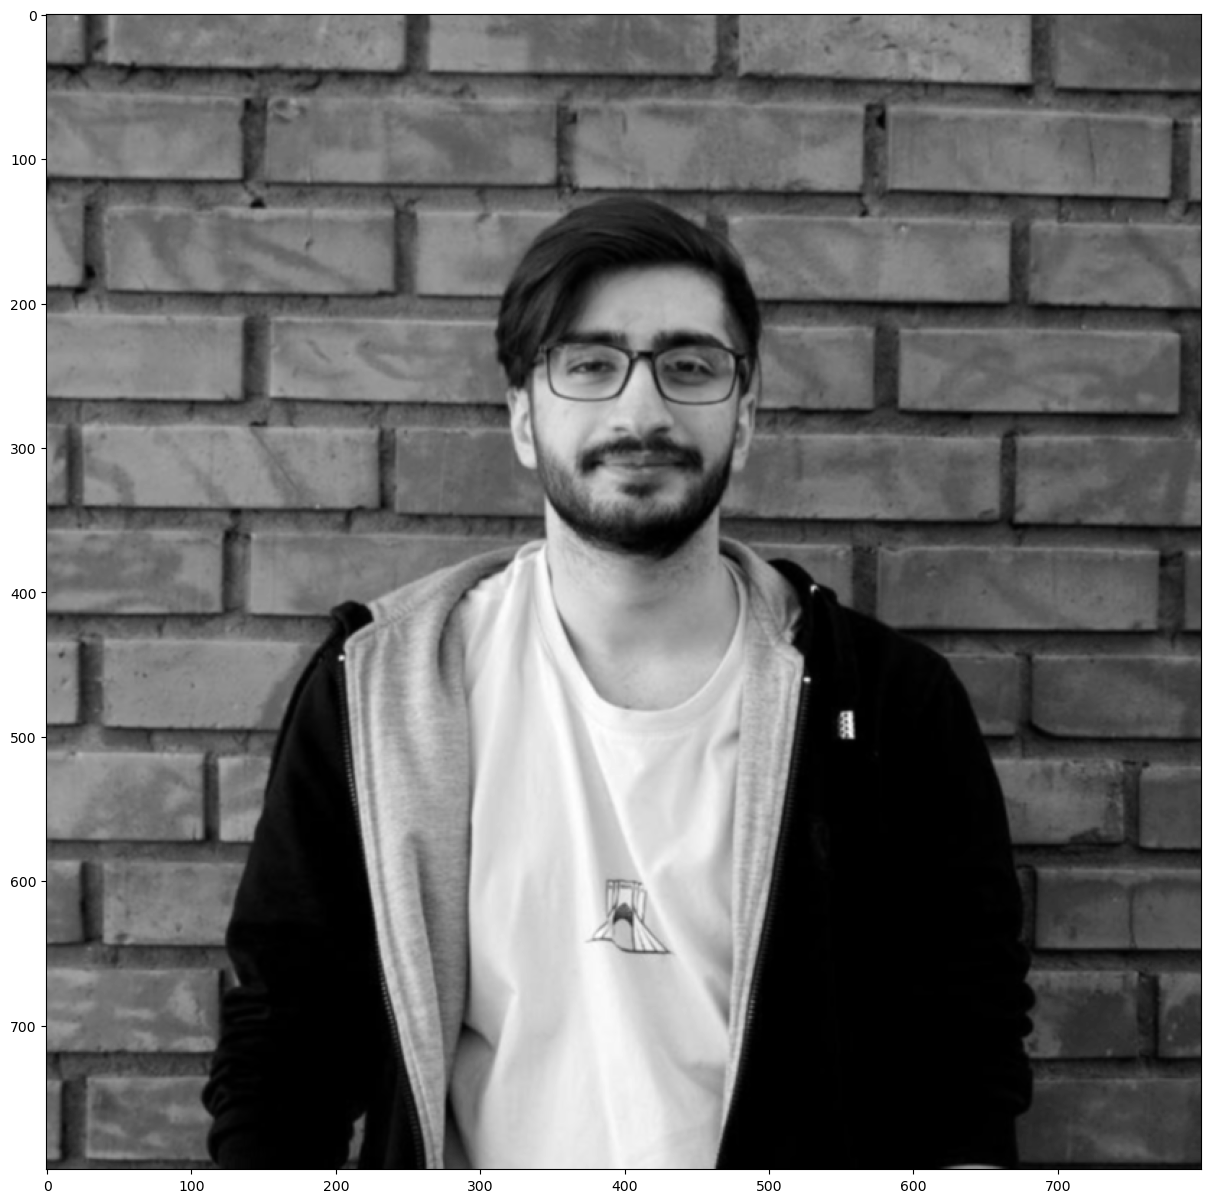

In [9]:
# define gaussian kernel
gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16 # CV_06.pdf page 9
smoothed_image = convolve(image, gaussian_kernel)
plt.figure(figsize=(15,15))
plt.imshow(smoothed_image, cmap='gray')

<Figure size 640x480 with 0 Axes>

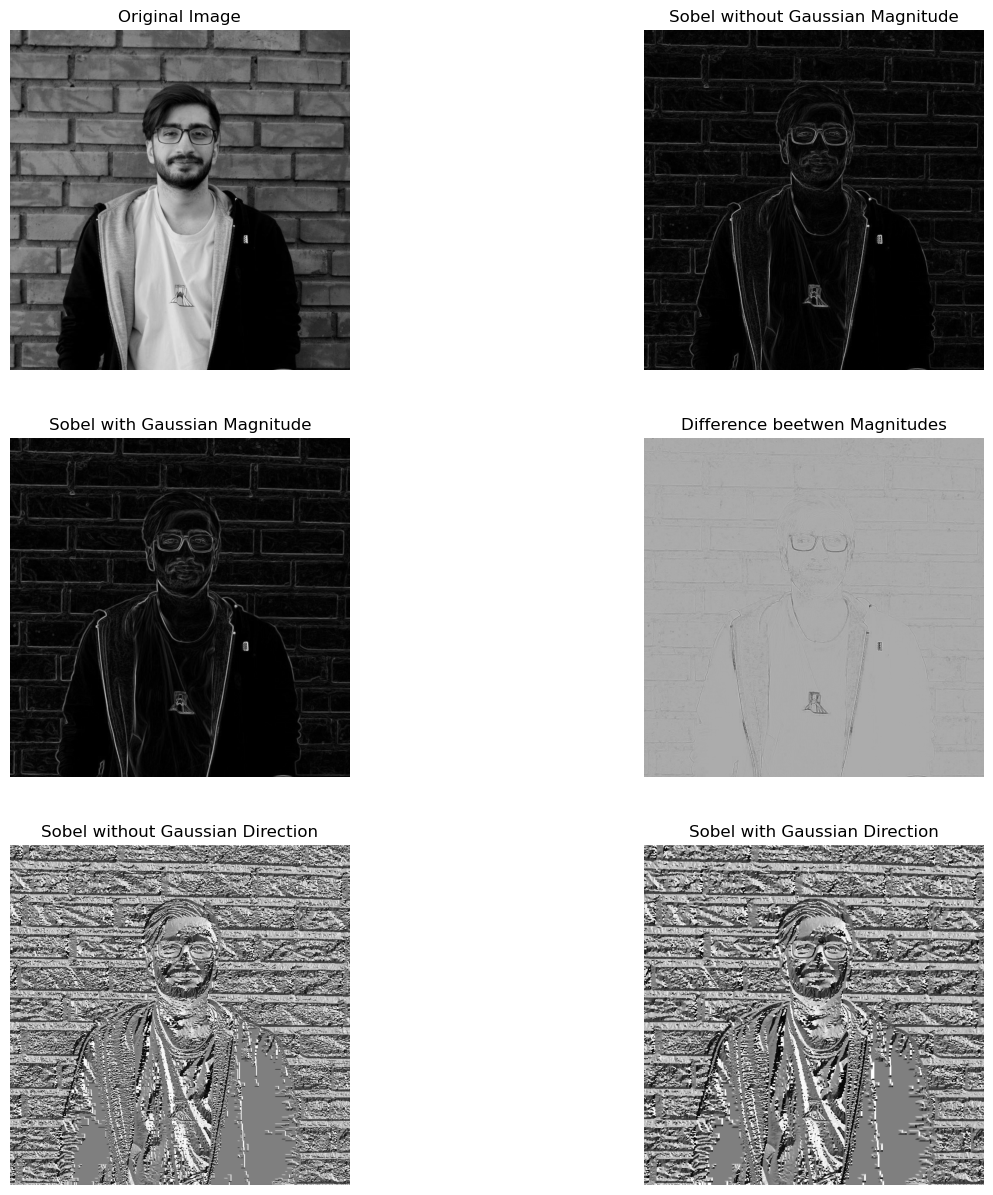

In [23]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them
image_horizontal_gradient = convolve(image, horizontal_sobel_kernel)
image_vertical_gradient = convolve(image, vertical_sobel_kernel)
sobel_without_gaussian_magnitude = calculate_magnitude(image_horizontal_gradient, image_vertical_gradient) 
sobel_without_gaussian_direction = calculate_direction(image_horizontal_gradient, image_vertical_gradient)
cv2.imshow('image', sobel_without_gaussian_magnitude)
cv2.waitKey(0)
# ----------------------------------------------
smoothed_image_horizontal_gradient = convolve(smoothed_image, horizontal_sobel_kernel)
smoothed_image_vertical_gradient = convolve(smoothed_image, vertical_sobel_kernel)
sobel_with_gaussian_magnitude = calculate_magnitude(smoothed_image_horizontal_gradient, smoothed_image_vertical_gradient)
sobel_with_gaussian_direction = calculate_direction(smoothed_image_horizontal_gradient, smoothed_image_vertical_gradient)
cv2.imshow('image', sobel_with_gaussian_magnitude)
cv2.waitKey(0)

plt.figure()
fugure, axis = plt.subplots(3, 2, figsize=(15,15))
axis[0, 0].imshow(image, cmap='gray')
axis[0, 0].set_title('Original Image')
axis[0, 1].imshow(sobel_without_gaussian_magnitude, cmap='gray')
axis[0, 1].set_title('Sobel without Gaussian Magnitude')
axis[1, 0].imshow(sobel_with_gaussian_magnitude, cmap='gray')
axis[1, 0].set_title('Sobel with Gaussian Magnitude')
axis[1, 1].imshow(sobel_with_gaussian_magnitude - sobel_without_gaussian_magnitude, cmap='gray')
axis[1, 1].set_title('Difference beetwen Magnitudes')
axis[2, 0].imshow(sobel_without_gaussian_direction, cmap='gray')
axis[2, 0].set_title('Sobel without Gaussian Direction')
axis[2, 1].imshow(sobel_with_gaussian_direction, cmap='gray')
axis[2, 1].set_title('Sobel with Gaussian Direction')
# remove axis numbers
axis[0, 0].axis('off')
axis[0, 1].axis('off')
axis[1, 0].axis('off')
axis[1, 1].axis('off')
axis[2, 0].axis('off')
axis[2, 1].axis('off')

plt.show()

# closing all open windows
cv2.destroyAllWindows()

(-0.5, 799.5, 799.5, -0.5)

<Figure size 640x480 with 0 Axes>

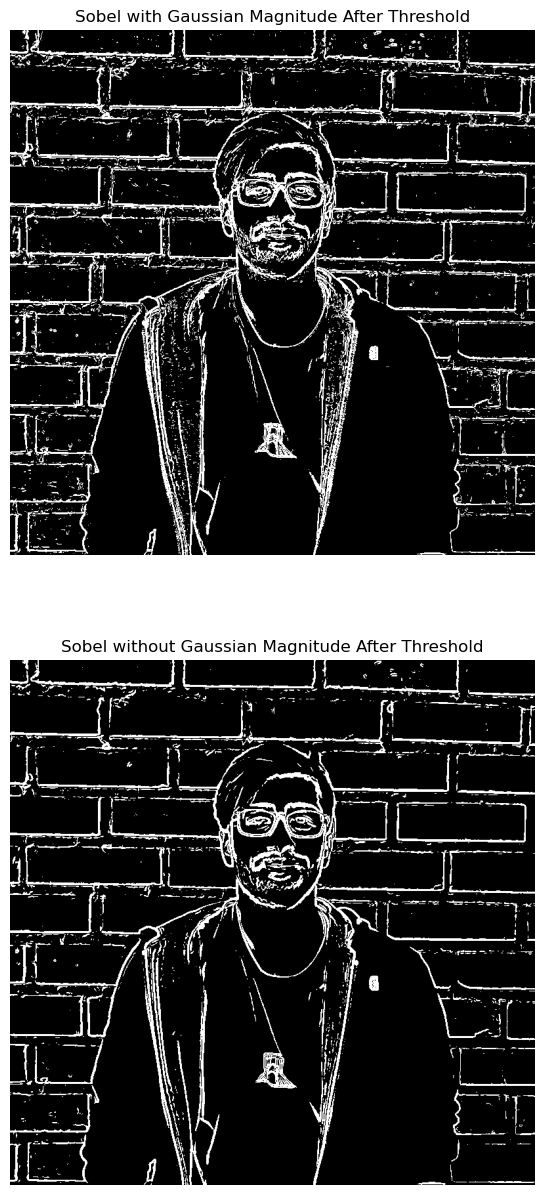

In [24]:
# make above than threshold 255 and under it 0
threshold = 70 
sobel_without_gaussian_magnitude_after_threshold = np.where(sobel_without_gaussian_magnitude > threshold, 255, 0)
sobel_with_gaussian_direction_after_threshold = np.where(sobel_with_gaussian_magnitude > threshold, 255, 0)
plt.figure()
fugure, axis = plt.subplots(2, 1, figsize=(15,15))
axis[0].imshow(sobel_without_gaussian_magnitude_after_threshold, cmap='gray')
axis[0].set_title('Sobel with Gaussian Magnitude After Threshold')
axis[1].imshow(sobel_with_gaussian_direction_after_threshold, cmap='gray')
axis[1].set_title('Sobel without Gaussian Magnitude After Threshold')
# remove axis numbers
axis[0].axis('off')
axis[1].axis('off')

(-0.5, 799.5, 799.5, -0.5)

<Figure size 640x480 with 0 Axes>

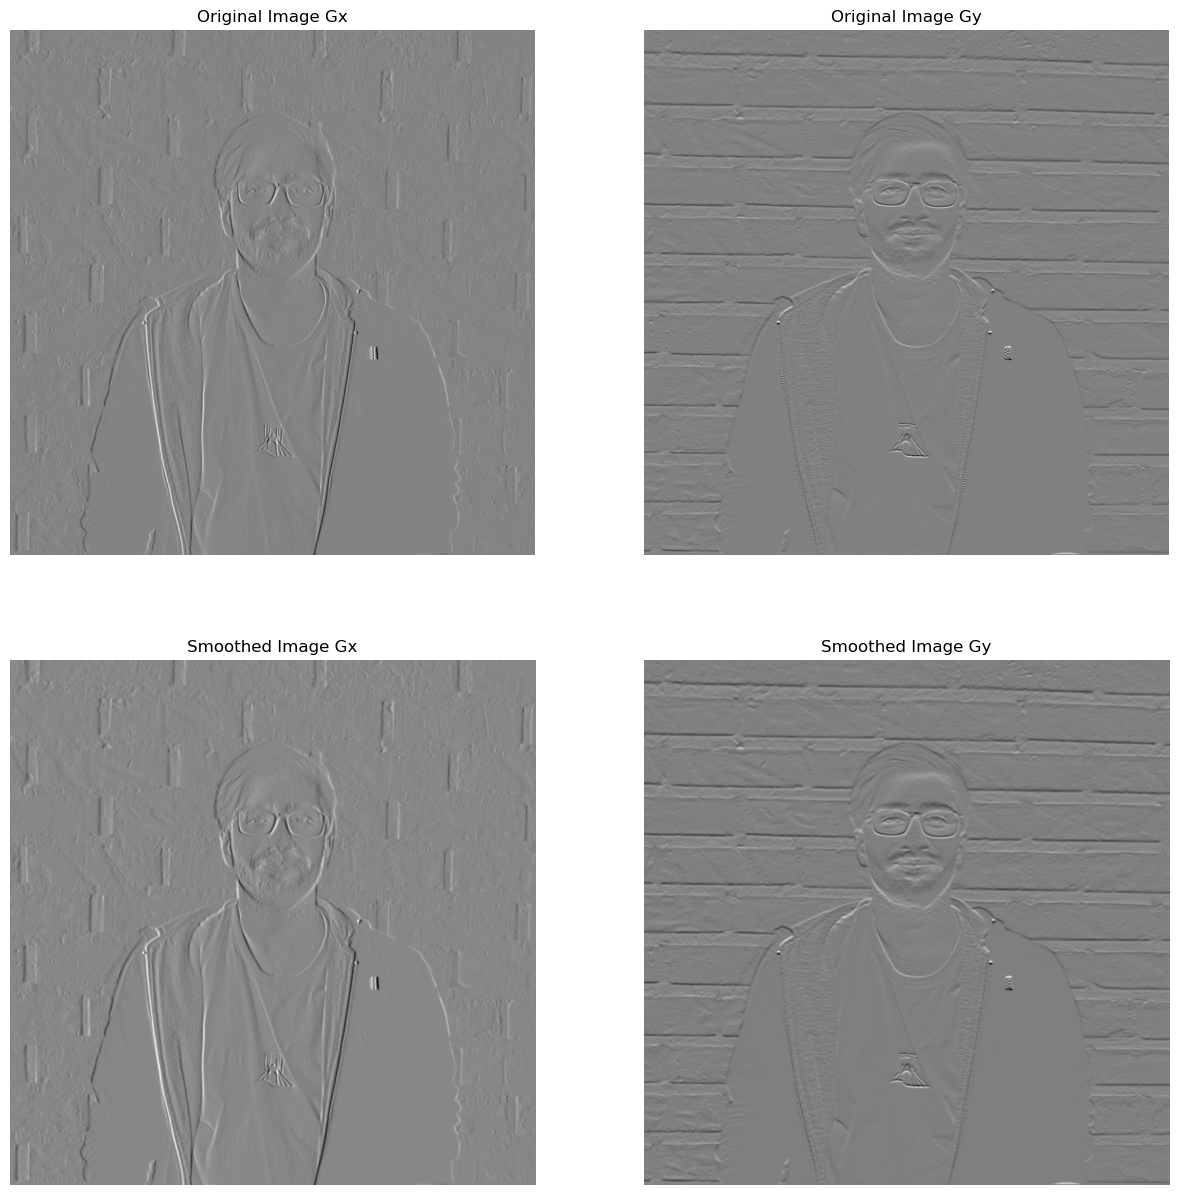

In [25]:
plt.figure()
fugure, axis = plt.subplots(2, 2, figsize=(15,15))
axis[0, 0].imshow(image_horizontal_gradient, cmap='gray')
axis[0, 0].set_title('Original Image Gx')
axis[0, 1].imshow(image_vertical_gradient, cmap='gray')
axis[0, 1].set_title('Original Image Gy')
axis[1, 0].imshow(smoothed_image_horizontal_gradient, cmap='gray')
axis[1, 0].set_title('Smoothed Image Gx')
axis[1, 1].imshow(smoothed_image_vertical_gradient, cmap='gray')
axis[1, 1].set_title('Smoothed Image Gy')
# remove axis numbers
axis[0, 0].axis('off')
axis[0, 1].axis('off')
axis[1, 0].axis('off')
axis[1, 1].axis('off')

<div dir="rtl">
    همان طور که میبینیم بعد از اعمال فیلتر گوسی لبه ها با وضوح بیشتری دیده می شوند . حساسیت آن نسبت به نویز کمتر است
</div>

## c)

<Figure size 2000x2000 with 0 Axes>

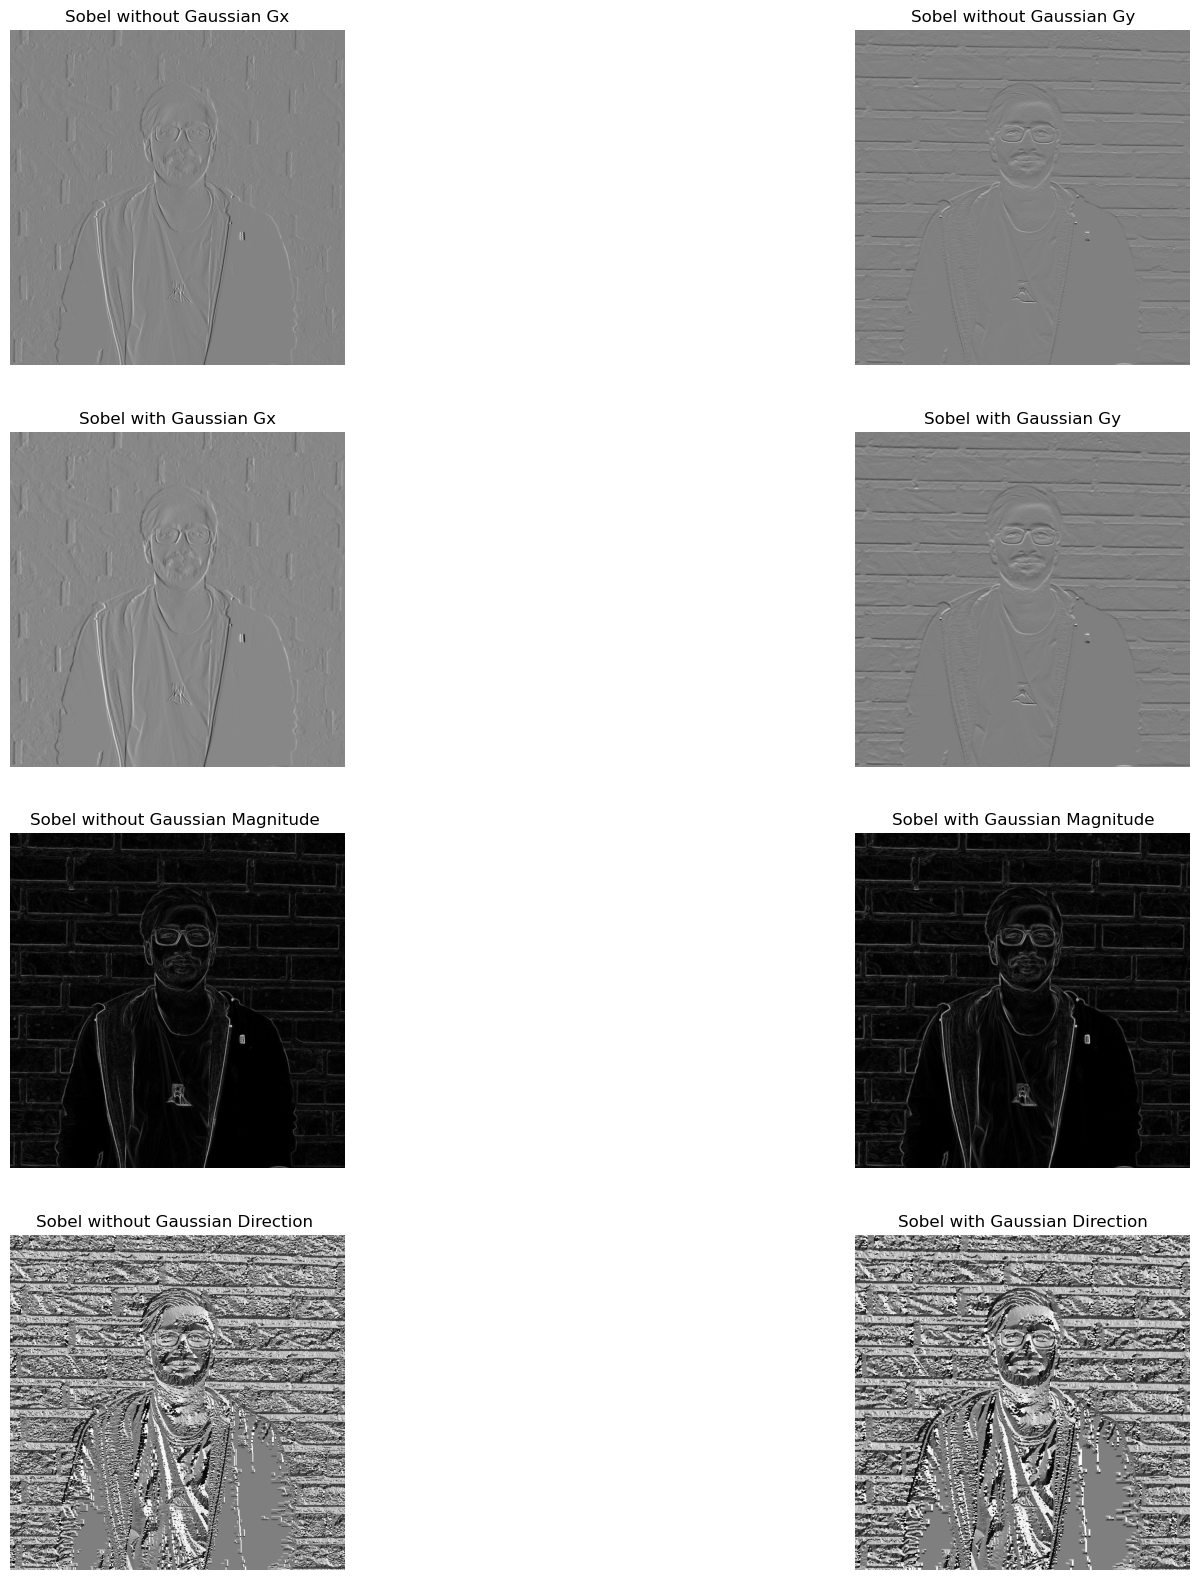

In [22]:
# do the operations in part b with OpenCV Sobel method and describe its parameters
# https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
# parameters of cv2.Sobel --> 
# عکس
# دقت(نوع داده خروجی را نشان میدهد که در اینجا ۶۴ بیت اعشاری است.)
# dx گرادیان افقی
# dy گرادیان عمودی
# kernel size سایز کرنل
image_opencv_sobel_grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
image_opencv_sobel_grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
image_opencv_sobel_grad_magnitude = np.sqrt(np.square(image_opencv_sobel_grad_x) + np.square(image_opencv_sobel_grad_y))
image_opencv_sobel_grad_direction = np.arctan2(image_opencv_sobel_grad_y, image_opencv_sobel_grad_x)
# cv2.imshow('image', image_opencv_sobel_grad_x)
# cv2.waitKey(0)
# cv2.imshow('image', image_opencv_sobel_grad_y)
# cv2.waitKey(0)

smoothed_image_opencv_sobel_grad_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
smoothed_image_opencv_sobel_grad_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
smoothed_image_opencv_sobel_grad_magnitude = np.sqrt(np.square(smoothed_image_opencv_sobel_grad_x) + np.square(smoothed_image_opencv_sobel_grad_y))
smoothed_image_opencv_sobel_grad_direction = np.arctan2(smoothed_image_opencv_sobel_grad_y, smoothed_image_opencv_sobel_grad_x)
# cv2.imshow('image', smoothed_image_opencv_sobel_grad_x)
# cv2.waitKey(0)
# cv2.imshow('image', smoothed_image_opencv_sobel_grad_y)
# cv2.waitKey(0)

cv2.destroyAllWindows()

plt.figure(figsize=(20,20))

fugure, axis = plt.subplots(4, 2, figsize=(20,20))
axis[0, 0].imshow(image_opencv_sobel_grad_x, cmap='gray')
axis[0, 0].set_title('Sobel without Gaussian Gx')
axis[0, 1].imshow(image_opencv_sobel_grad_y, cmap='gray')
axis[0, 1].set_title('Sobel without Gaussian Gy')
axis[1, 0].imshow(smoothed_image_opencv_sobel_grad_x, cmap='gray')
axis[1, 0].set_title('Sobel with Gaussian Gx')
axis[1, 1].imshow(smoothed_image_opencv_sobel_grad_y, cmap='gray')
axis[1, 1].set_title('Sobel with Gaussian Gy')
axis[2, 0].imshow(image_opencv_sobel_grad_magnitude, cmap='gray')
axis[2, 0].set_title('Sobel without Gaussian Magnitude ')
axis[2, 1].imshow(smoothed_image_opencv_sobel_grad_magnitude, cmap='gray')
axis[2, 1].set_title('Sobel with Gaussian Magnitude')
axis[3, 0].imshow(image_opencv_sobel_grad_direction, cmap='gray')
axis[3, 0].set_title('Sobel without Gaussian Direction ')
axis[3, 1].imshow(smoothed_image_opencv_sobel_grad_direction, cmap='gray')
axis[3, 1].set_title('Sobel with Gaussian Direction')

# remove axis numbers
axis[0, 0].axis('off')
axis[0, 1].axis('off')
axis[1, 0].axis('off')
axis[1, 1].axis('off')
axis[2, 0].axis('off')
axis[2, 1].axis('off')
axis[3, 0].axis('off')
axis[3, 1].axis('off')

plt.show()

<div dir="rtl">
برای اجرای عملگر Sobel در OpenCV، ابتدا تصویر مورد نظر را بارگیری می کنیم. سپس با استفاده از تابع cv2.Sobel، گرادیان های افقی و عمودی را محاسبه می کنیم. پارامترهای تابع Sobel شامل تصویر واقعی، نوع داده خروجی، ترکیب گرادیان (افقی یا عمودی) و سایز کرنل هستند. به عنوان مثال:
```
import cv2
img = cv2.imread('afshin.jpg',0)
grad_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
grad_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
```
در اینجا، تصویر ورودی با استفاده از تابع imread به صورت خاکستری بارگیری شده است. سپس با استفاده از تابع Sobel، گرادیان های افقی و عمودی با سایز کرنل ۳*۳ محاسبه شده است. پارامتر CV_64F نوع داده خروجی را نشان میدهد که در اینجا ۶۴ بیت اعشاری است.

</div>